In [64]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import numpy as np
from scipy.stats import norm
import os
%matplotlib inline

In [3]:
def download_stockdata(tickers, source, start_date, end_date):
    df_list = []
    for ticker in tickers:
        stock_data = data.DataReader(ticker, source , start_date, end_date)
        stock_data['ticker'] = ticker
        df_list.append(stock_data)
    all_stock_data = pd.concat(df_list)
    
    return all_stock_data
        

In [8]:
tickers = ['AAPL', 'MSFT', '^GSPC','GOOG']
start_date = '2019-10-30'
end_date = '2019-10-31'

df_out = download_stockdata(tickers,'yahoo', start_date, end_date)

In [51]:
stock_data = data.DataReader(tickers, 'yahoo', start_date, end_date).stack(level=1).reset_index()

In [7]:
stock_data = data.DataReader("goog", 'yahoo', start_date, end_date)

In [9]:
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-29,1281.589966,1257.212036,1276.229980,1262.619995,1886400,1262.619995
2019-10-30,1269.359985,1252.000000,1252.969971,1261.290039,1408900,1261.290039
2019-10-31,1267.670044,1250.843018,1261.280029,1260.109985,1455700,1260.109985


In [10]:
stock_data['Close'].shift(1)

Date
2019-10-29            NaN
2019-10-30    1262.619995
2019-10-31    1261.290039
Name: Close, dtype: float64

In [14]:
goog = data.DataReader('GOOG', data_source='yahoo',
start='3/14/2009', end='4/14/2014')

In [15]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-04-08,553.480408,540.127075,541.114380,553.380676,3151200.0,553.380676
2014-04-09,563.822021,551.436035,558.087769,562.595398,3330800.0,562.595398
2014-04-10,563.453064,538.421753,563.453064,539.468872,4036800.0,539.468872
2014-04-11,538.521484,525.088379,531.091858,529.147217,3924800.0,529.147217
2014-04-14,542.610291,528.110046,536.776306,531.061951,2575000.0,531.061951


In [54]:
goog['Log_Ret']=np.log(goog['Close']/goog['Close'].shift(1))
goog['Volatility'] = goog['Log_Ret'].rolling(252).std() * np.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AA98A5278>,
      dtype=object)

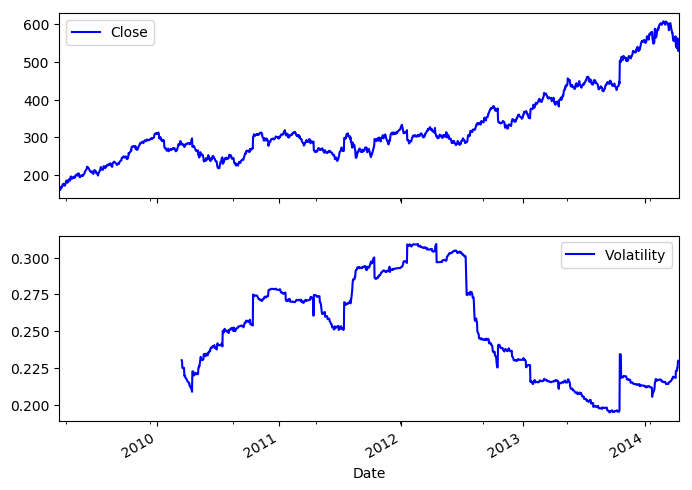

In [55]:
goog[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AA788CA90>]],
      dtype=object)

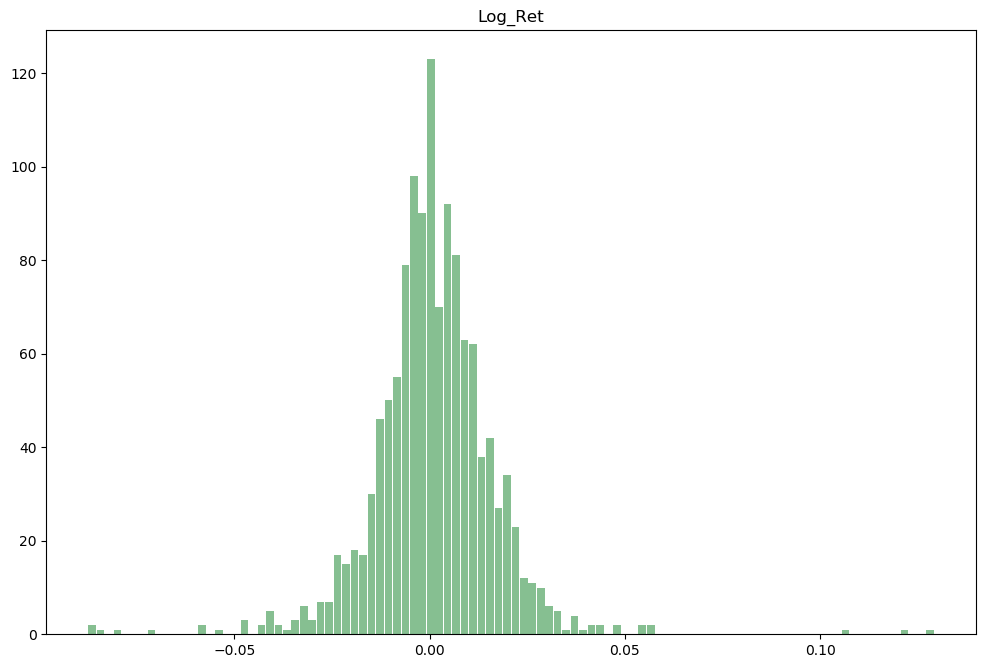

In [50]:
goog.hist(column='Log_Ret',bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9) 

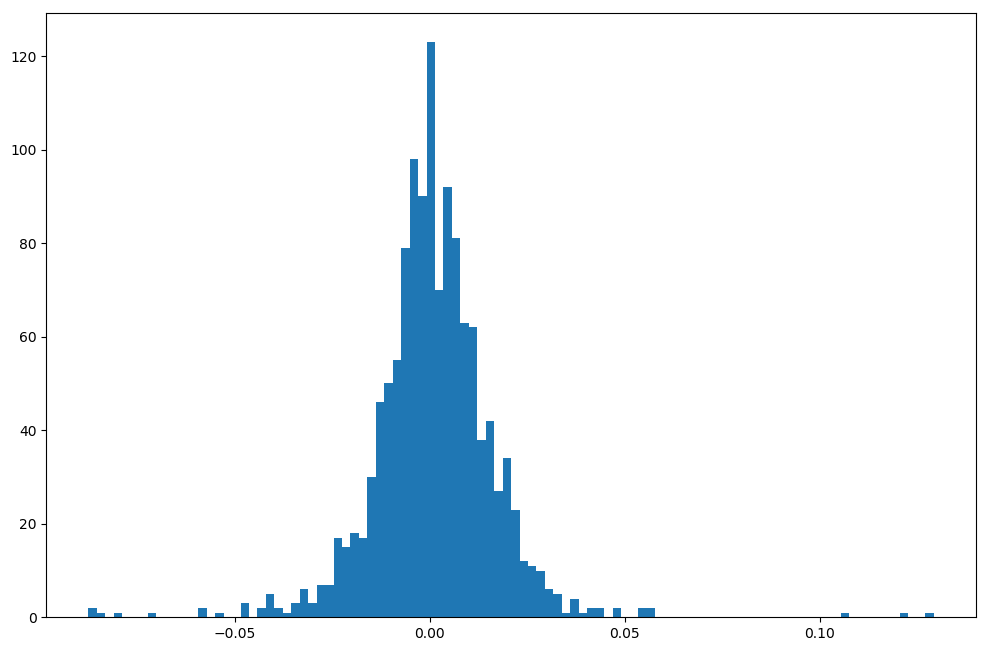

In [84]:
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})
(mu, sigma) = norm.fit(goog['Log_Ret'].dropna())
plt.hist(goog['Log_Ret'],bins=100)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [56]:
import seaborn as sns

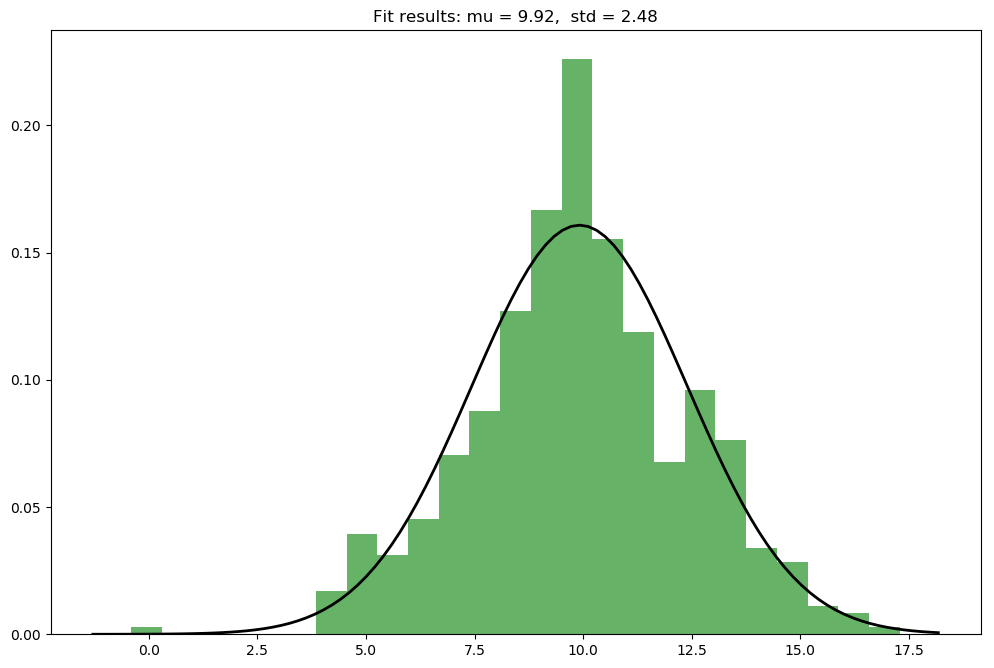

In [90]:
# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\kmanukon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kmanukon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\kmanukon\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kmanukon\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kmanukon\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for mul

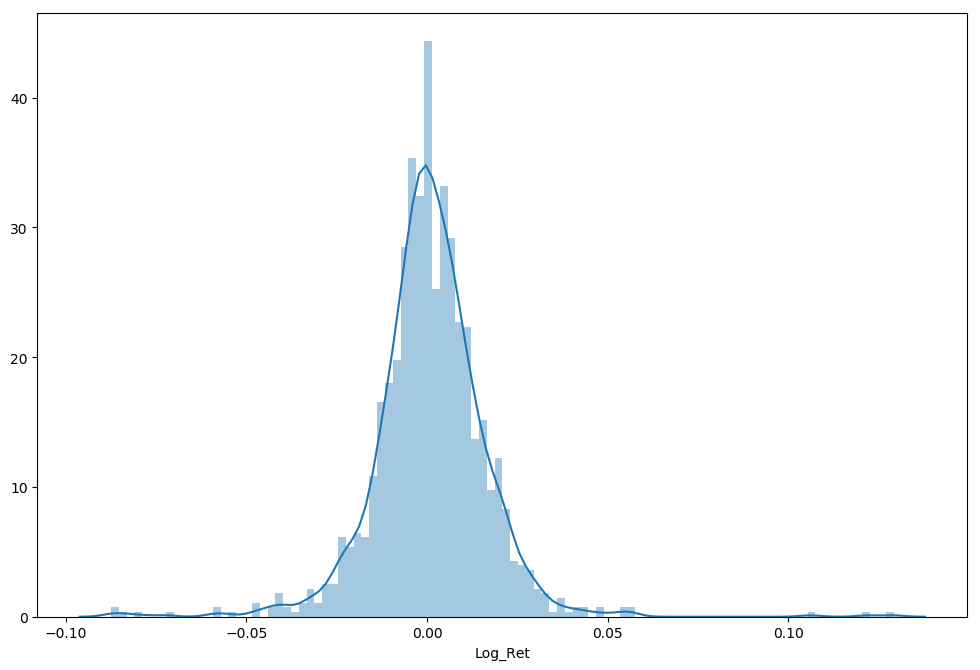

In [57]:
sns.distplot(goog['Log_Ret'],bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AA71DE3C8>,
      dtype=object)

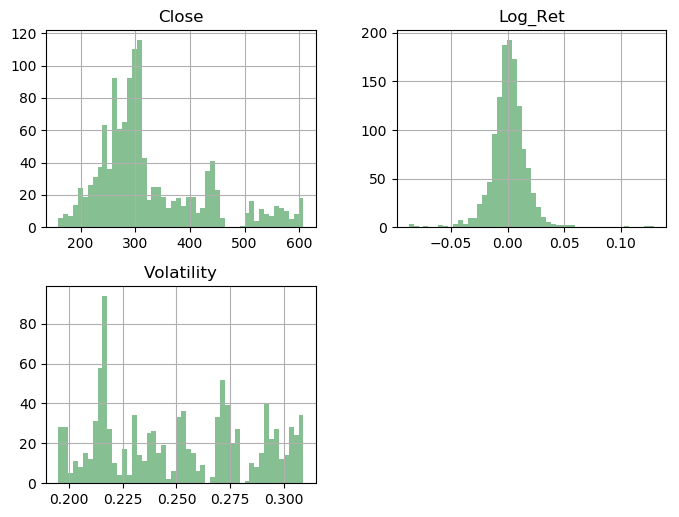

In [48]:
goog[['Close', 'Volatility','Log_Ret']].hist(color='#86bf91',figsize=(8, 6),bins=50)